In [1]:
import numpy as np
import scipy.optimize as opt
from scipy.io import loadmat
import functions as funcs
import re
%matplotlib inline

# Build a spam filter

In [2]:
data = loadmat('data/ex6data1.mat')
X, y = data['X'], data['y'][:, 0]

# Display data
plot positive and negative examples

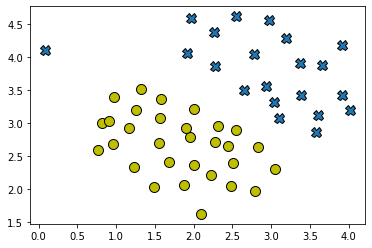

In [3]:
funcs.displayData(X,y)

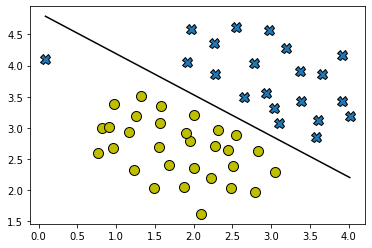

In [4]:
C = 1
clf = funcs.svmTrain(X,y,C)
funcs.displayData(X,y,clf=clf)

# Test Gaussian kernel
- I wont be using this since I'm using sklearn but its part of the exercise

In [5]:
x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma=2
sim = funcs.gaussianKernel(x1,x2,sigma)
print('Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = %0.2f:'
      '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n' % (sigma, sim))

Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = 2.00:
	0.324652
(for sigma = 2, this value should be about 0.324652)



# Non-linear data

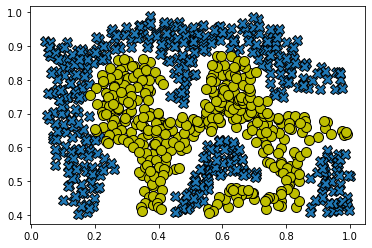

In [6]:
data2 = loadmat('data/ex6data2.mat')
X2, y2 = data2['X'], data2['y'][:,0]
funcs.displayData(X2, y2)

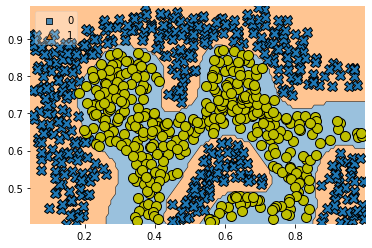

In [7]:
C = 100
sigma = 100
clf2 = funcs.svmTrain(X2,y2,C, kernel = 'rbf', gamma=sigma)
funcs.displayData(X2, y2, clf=clf2)

# Notes
- Seems like C works very differently with sklearn, it needs to be much larger
- Same with sigma

# Data set 3

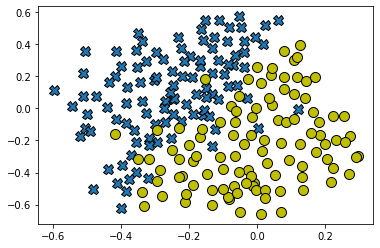

In [8]:
data3 = loadmat('data/ex6data3.mat')
X3, y3, Xval, yval = data3['X'], data3['y'][:,0], data3['Xval'], data3['yval'][:,0]
funcs.displayData(X3, y3)

Best value of C: 35.11191734215131
Best value of $\sigma$: 8.111308307896872


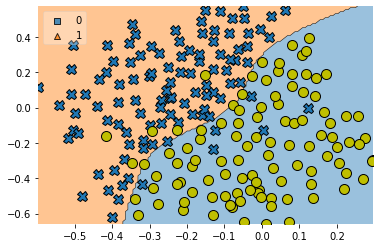

In [9]:
C, sigma, clf = funcs.dataSet3Params(X3, y3, Xval, yval, C_range=(-1,3), sig_range=(0,1))
funcs.displayData(X3, y3, clf=clf)
print('Best value of C: {}'.format(C))
print('Best value of $\sigma$: {}'.format(sigma))

# Notes
- Again C and sigma come out much different than the matlab example
- Tried various ranges and can get very different results depending on the size of the range and the number of steps
- I believe this difference is related to the subtle differences between rbf and gaussian kernels

In [10]:
with open('data/emailSample1.txt') as fid:
    file_contents = fid.read()

word_indices  = funcs.processEmail(file_contents, 'data/vocab.txt')

#Print Stats
print('-------------')
print('Word Indices:')
print('-------------')
print(word_indices)

----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr
-------------
Word Indices:
-------------
[85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1894, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 476, 1119, 1892, 1509, 798, 1181, 1236, 511, 1119, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530]


In [11]:
vocab_list = funcs.getVocabList('data/vocab.txt')
num_vocab = len(vocab_list)
features = funcs.emailFeatures(word_indices, num_vocab)
print('Length of feature vector: {}'. format(len(features)))
print('Non-zero features: {}'.format(np.sum(features > 0)))

Length of feature vector: 1899
Non-zero features: 45


In [18]:
spamData = loadmat('data/spamTrain.mat')
spamX, spamy = spamData['X'], spamData['y'][:,0]
testData = loadmat('data/spamTest.mat')
Xtest, ytest = testData['Xtest'], testData['ytest'][:,0]
C=0.1
clf = funcs.svmTrain(spamX, spamy, C, kernel='linear')
p = clf.predict(Xtest)
ptrain = clf.predict(spamX)
train_acc = 100.0 * np.mean(ptrain == spamy)
accuracy = 100.0 * np.mean(p == ytest)
print('Training set accuracy: {} (should be 99.85)'.format(train_acc))
print('Test set accuracy: {} (should be 98.9)'.format(accuracy))

Training set accuracy: 99.825 (should be 99.85)
Test set accuracy: 98.9 (should be 98.9)


In [37]:
weights = np.array([[i, w] for i,w in enumerate(clf.coef_[0])])
sorted_weights = np.flip(weights[weights[:,1].argsort()],axis=0)
print('-----------------\nTwenty heaviest weighted words:')
for i in range(20):
    print('\t {}: {} || {}'.format(i+1,vocab_list[int(sorted_weights[i][0])], sorted_weights[i,1]))


-----------------
Twenty heaviest weighted words:
	 1: our || 0.5006137361746403
	 2: click || 0.465916390688888
	 3: remov || 0.42286911706104086
	 4: guarante || 0.38362160179406524
	 5: visit || 0.367710398245535
	 6: basenumb || 0.3450640979461706
	 7: dollar || 0.3236320357963838
	 8: will || 0.2697241060374008
	 9: price || 0.2672977146177071
	 10: pleas || 0.2611688867001495
	 11: most || 0.2572981979518164
	 12: nbsp || 0.2539414551595324
	 13: lo || 0.25346652431419925
	 14: ga || 0.24829699045568662
	 15: hour || 0.24640435783158998
	 16: al || 0.23731066817215565
	 17: da || 0.2332612152321099
	 18: se || 0.2329549624596594
	 19: want || 0.23194709265954988
	 20: dollarnumb || 0.22963916284457375


# Notes
- I get a slightly different list but most are the same, just in a different ish order